**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as ts
import os
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from IPython.display import Image
from glob import glob
import cv2
import random
import warnings
warnings.simplefilter('ignore')
import glob as gb

**Ultralytics is a company known for its work on advanced machine learning and computer vision models and contains yolo**

In [2]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.7/872.7 kB 15.1 MB/s eta 0:00:00


**Create model yolo**

In [3]:
import ultralytics
from ultralytics import YOLO
yolo_model=YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 92.1MB/s]


**Loads images and show samples from images**

<Figure size 2000x2000 with 0 Axes>

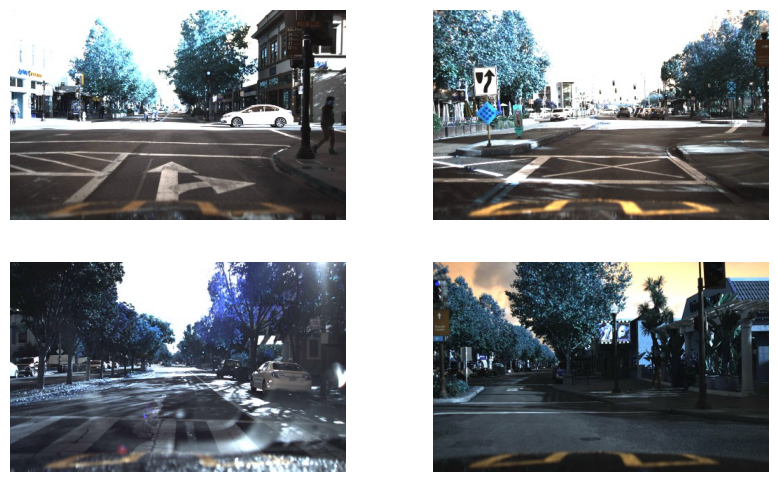

In [ ]:
root_path='/content/drive/MyDrive/OD/images'
num_samples=4

files=gb.glob(pathname=str(root_path+'/*.jpg'))
plt.figure(figsize=(20,20))
random_image=random.sample(files,num_samples)
plt.figure(figsize=(10,6))
for i in range(num_samples):
  plt.subplot(2,2,i+1)
  plt.imshow(cv2.imread(random_image[i]))
  plt.axis('off')


model yolo for to detect object


In [ ]:
images=[]
for i in range(num_samples):
  output_yolo=yolo_model.predict(random_image[i])
  output=output_yolo[0]
  box=output.boxes
  names=output.names

  for x in range(len(box)):
    labels=names[box.cls[x].item()]
    coordinate=box.xyxy[x].tolist()
    confidence=np.round(box.conf[x].item(),2)

    print(f'this object{x+1}:{labels}')
    print(f'coordinate are : {coordinate}')
    print(f'confidence : {confidence}')
  images.append(output.plot()[:,:,::-1])


image 1/1 /content/drive/MyDrive/OD/images/1478020380702593247.jpg: 416x640 5 persons, 1 car, 2436.6ms
Speed: 16.0ms preprocess, 2436.6ms inference, 36.9ms postprocess per image at shape (1, 3, 416, 640)
this object1:car
coordinate are : [300.1138916015625, 134.9212646484375, 406.1122741699219, 168.45172119140625]
confidence : 0.9
this object2:person
coordinate are : [430.70013427734375, 123.05992126464844, 469.13800048828125, 207.18685913085938]
confidence : 0.89
this object3:person
coordinate are : [0.11104917526245117, 133.82638549804688, 14.593958854675293, 163.90704345703125]
confidence : 0.65
this object4:person
coordinate are : [127.1949691772461, 134.64305114746094, 135.28799438476562, 155.1876678466797]
confidence : 0.57
this object5:person
coordinate are : [202.046630859375, 142.13600158691406, 212.9798583984375, 160.24256896972656]
confidence : 0.35
this object6:person
coordinate are : [0.02797222137451172, 134.87770080566406, 10.358376502990723, 164.3477020263672]
confiden

In [ ]:
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

**show images with box and labels**

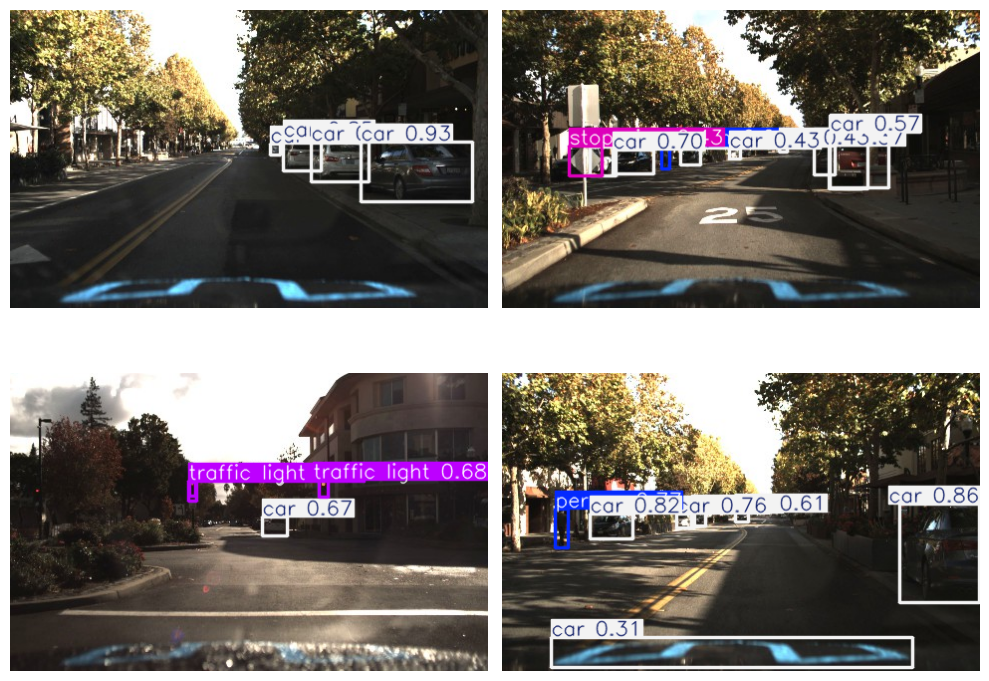

In [ ]:
plt.figure(figsize=(10,8))
for i,img in enumerate(images):
  plt.subplot(2 ,2 ,i+1)
  plt.imshow(img)
  plt.axis('off')
plt.tight_layout()
plt.show()

**"Method for object detection: Provide an image and specify the objects present in the image."**

In [4]:
def ODIMAGE(image):
  output_yolo=yolo_model.predict(image)
  output=output_yolo[0]
  box=output.boxes
  names=output.names

  for x in range(len(box)):
    labels=names[box.cls[x].item()]
    coordinate=box.xyxy[x].tolist()
    confidence=np.round(box.conf[x].item(),2)

    print(f'this object{x+1}:{labels}')
    print(f'coordinate are : {coordinate}')
    print(f'confidence : {confidence}')
  image_ob=(output.plot()[:,:,::-1])
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(cv2.imread(image,cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB))
  plt.title('Original image')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(image_ob)
  plt.axis('off')
  plt.title('OD image')
  plt.show()


image 1/1 /content/drive/MyDrive/OD/People/00000765.jpg: 640x480 1 person, 2320.9ms
Speed: 6.0ms preprocess, 2320.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)
this object1:person
coordinate are : [96.2623519897461, 67.5047836303711, 594.8511962890625, 1022.5244140625]
confidence : 0.95


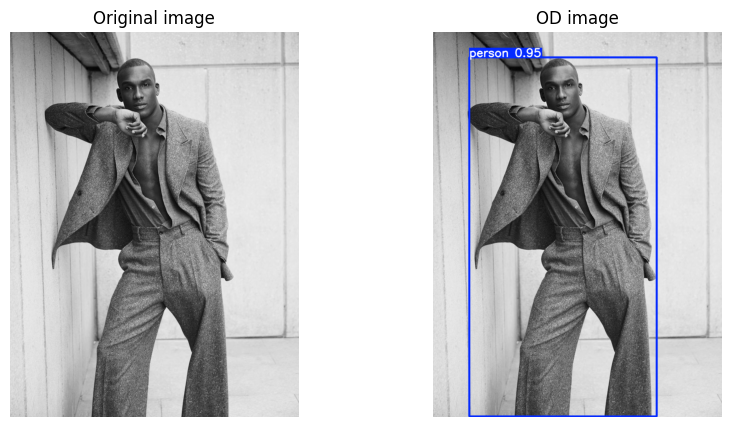

In [ ]:
ODIMAGE('/content/drive/MyDrive/OD/People/00000765.jpg')


image 1/1 /content/drive/MyDrive/OD/fruits/apple_1.jpg: 640x640 1 apple, 2489.6ms
Speed: 4.7ms preprocess, 2489.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
this object1:apple
coordinate are : [26.148340225219727, 58.18088912963867, 309.49652099609375, 339.60260009765625]
confidence : 0.95


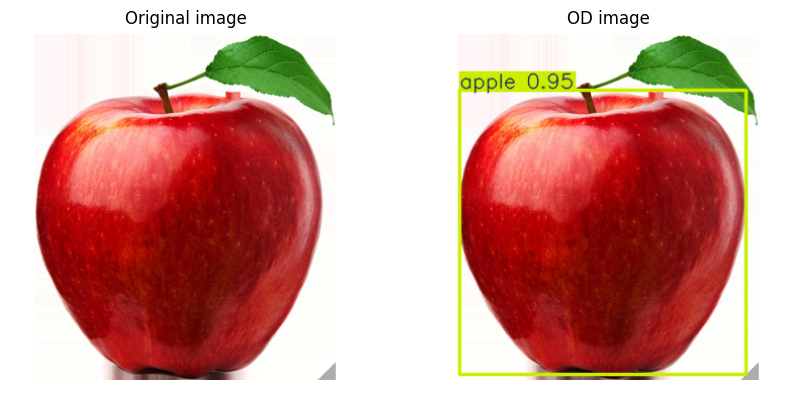

In [ ]:
ODIMAGE('/content/drive/MyDrive/OD/fruits/apple_1.jpg')


image 1/1 /content/drive/MyDrive/OD/streets/vid_4_10000.jpg: 384x640 1 car, 986.6ms
Speed: 4.2ms preprocess, 986.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
this object1:car
coordinate are : [23.148387908935547, 198.0782012939453, 112.59541320800781, 231.32847595214844]
confidence : 0.91


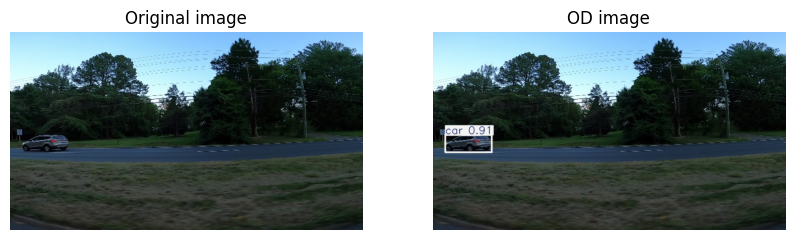

In [ ]:
ODIMAGE('/content/drive/MyDrive/OD/streets/vid_4_10000.jpg')


image 1/1 /content/WhatsApp Image 2024-08-26 at 12.18.56 AM.jpeg: 640x640 6 persons, 2 cars, 1740.2ms
Speed: 17.7ms preprocess, 1740.2ms inference, 32.2ms postprocess per image at shape (1, 3, 640, 640)
this object1:person
coordinate are : [183.80274963378906, 38.0628662109375, 587.935546875, 766.9172973632812]
confidence : 0.95
this object2:person
coordinate are : [533.2131958007812, 199.72181701660156, 602.07080078125, 289.9646911621094]
confidence : 0.79
this object3:person
coordinate are : [689.9110717773438, 215.00416564941406, 739.3207397460938, 376.398681640625]
confidence : 0.79
this object4:person
coordinate are : [643.1804809570312, 214.20506286621094, 701.1990966796875, 377.851318359375]
confidence : 0.77
this object5:car
coordinate are : [0.8302001953125, 227.5088653564453, 752.4577026367188, 766.4349975585938]
confidence : 0.64
this object6:car
coordinate are : [534.06494140625, 280.48272705078125, 767.597900390625, 766.6754760742188]
confidence : 0.51
this object7:person

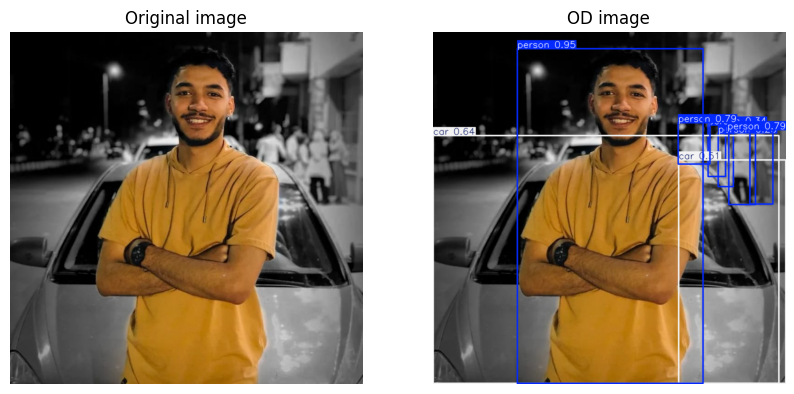

In [5]:
ODIMAGE('/content/WhatsApp Image 2024-08-26 at 12.18.56 AM.jpeg')